In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.9.1


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,test_labels) = fashion_mnist.load_data()

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

|Label |Class|
|------|------|
0|	T-shirt/top
1|	Trouser
2|	Pullover
3|	Dress
4|	Coat
5|	Sandal
6|	Shirt
7|	Sneaker
8|	Bag
9|	Ankle boot

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


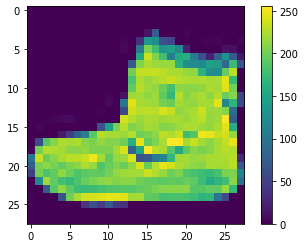

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0

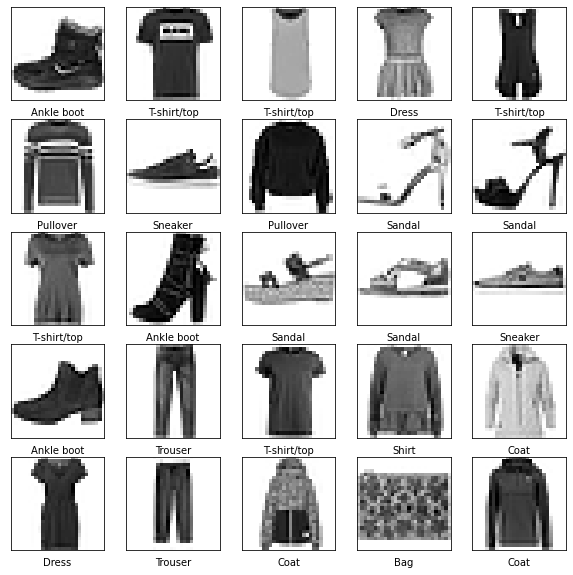

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(10)
])

In [18]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)

In [19]:
tf.config.run_functions_eagerly(True)

model.fit(train_images,train_labels, epochs=10)

Epoch 1/10


c:\users\rishabh rathore\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1875/1875 [==============================] - 25s 13ms/step - loss: 0.4937 - accuracy: 0.8274
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3742 - accuracy: 0.8637
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3366 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.3139 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2969 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2808 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2681 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2565 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2483 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 24s 13ms/step - lo

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.3267 - accuracy: 0.8853 - 2s/epoch - 6ms/step

Test accuracy: 0.8852999806404114


In [30]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [31]:
predictions = probability_model .predict(test_images)

 37/313 [==>...........................] - ETA: 0s

c:\users\rishabh rathore\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 3ms/step


In [32]:
predictions[0]

array([2.8230872e-07, 3.9530810e-09, 2.4747846e-09, 2.4131672e-09,
       4.2480613e-10, 3.4294379e-04, 3.4604579e-08, 3.7116855e-03,
       6.2728178e-10, 9.9594504e-01], dtype=float32)

In [33]:
np.argmax(predictions[0])

9

In [34]:
test_labels[0]

9

In [35]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

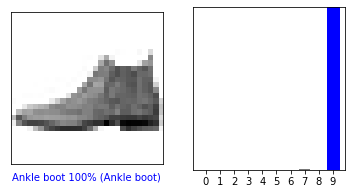

In [36]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i], test_labels)
plt.show()

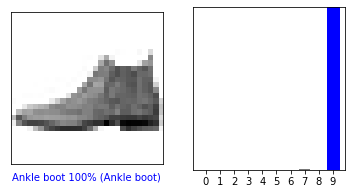

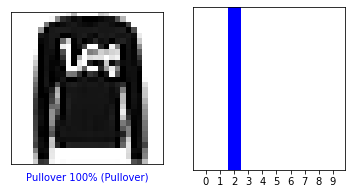

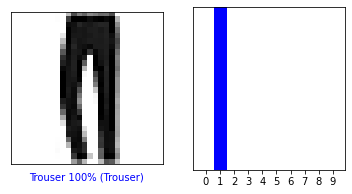

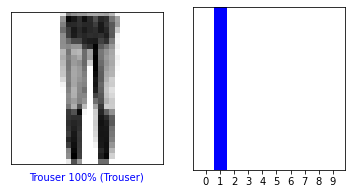

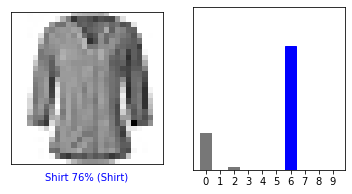

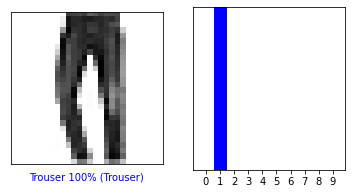

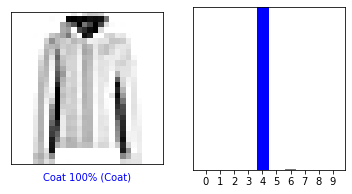

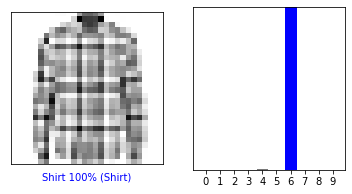

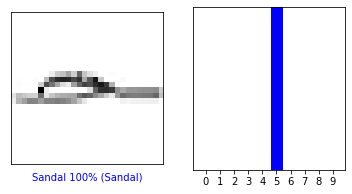

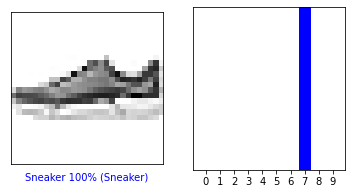

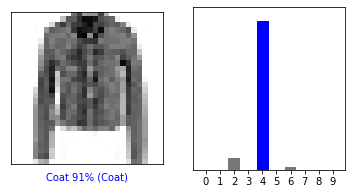

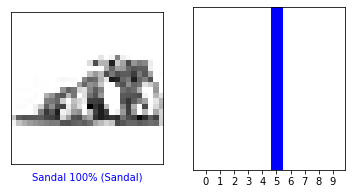

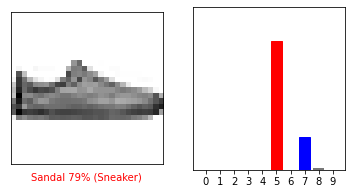

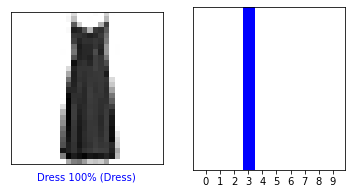

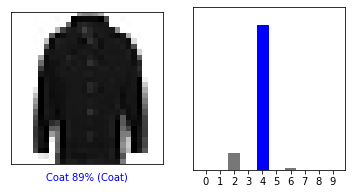

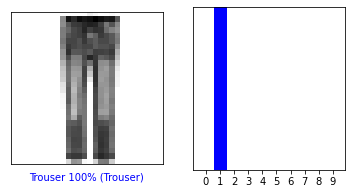

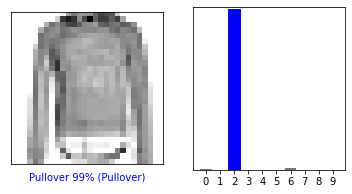

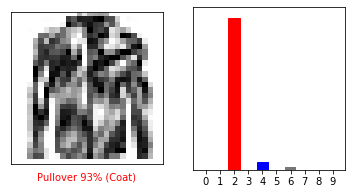

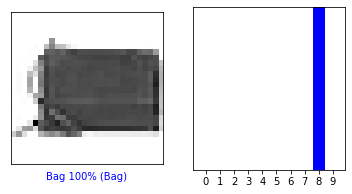

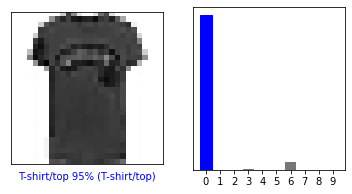

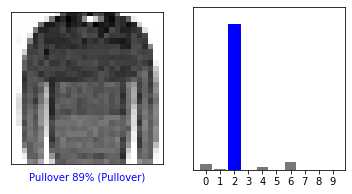

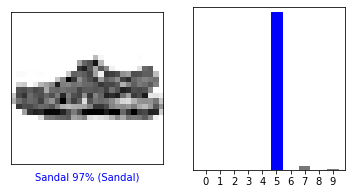

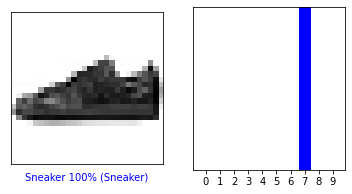

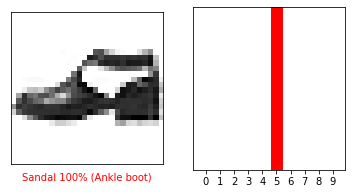

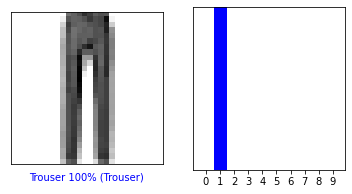

In [38]:
for i in range(25):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()